## Extended Example: Maze

In this section we write a program to generate a random maze. We will
use Aldous-Broder's algorithm, which goes as follows:

> Start with a maze grid with all walls up (a bunch of individual,
> walled cells). Pick a point, and move to a neighboring cell at random.
> If the new cell has all of its walls still up, then knock the walls
> down between the previous cell and the new cell. Keep moving to
> neighboring cells until all cells have been visited.

We will start with the recipe, and then break each piece down into
pieces.

- Make Maze
- Draw Maze

then we expand those pieces

- Make Maze
  - Initialize Maze
  - Pick a point
  - Move to a neighboring cell at random
  - If the new cell has all of its walls still up...
    - Knock the walls down between the previous cell and the new cell
  - Keep moving to neighboring cells until all cells have been visited. → this turns into a while loop
- Draw Maze
  - For all of the rows...
    - Draw one row of the maze

then we structure the while-loop

- Make Maze
  - Initialize Maze
  - Pick a cell
  - Count this cell as visited
  - While we still have cells to visit...
    - Move to a neighboring cell at random
    - If the new cell has all of its walls still up...
  - Knock the walls down between the previous cell and the new cell   - Count this new cell as visited
- Draw Maze
  - For all of the rows...
    - Draw one row of the maze

At this point we have to make some decisions about how to represent the
maze itself. Pretty much we need to have a number of rows and columns
for the maze, and know which walls are up for the particular cell. For
example, say we have the following 3x3 maze, and a summary of the
information to describe this maze:

                       +--+--+--+
                       |        |
                       +--+  +--+
                       |        |
                       +--+  +  +
                       |     |  |
                       +--+--+--+

The information in this maze is the following (recall that Python lists index starting from 0 not 1, so rows and columns are numbered from 0):

| Index | Row | Column | N | E | W | S |
|-------|-----|--------|---|---|---|---|
| 0     | 0   | 0      | y | n | y | y |
| 1     | 1   | 0      | y | n | y | y |
| 2     | 2   | 0      | y | n | y | y |
| 3     | 0   | 1      | y | n | n | n |
| 4     | 1   | 1      | n | n | n | n |
| 5     | 2   | 1      | n | y | n | y |
| 6     | 0   | 2      | y | y | n | y |
| 7     | 1   | 2      | y | y | n | n |
| 8     | 2   | 2      | n | y | y | y |

We could have 4 separate lists (or lists of lists, to get 2-D structure)
representing north, south, east, and west walls, or we can be a bit more
clever and do it in one. If we assign the following values:

    M =

      11   8  13
      11   0  12
      11   5   7


Here I have set the following values: 
$$N=8$$
$$E=4$$
$$W=2$$
$$S=1$$

and simply added them up. In that way, all of the possible combinations
of walls are specified by a single number from 0 (no walls) to 15 (all
walls = 8+4+2+1). We will want a conversion between this number format
to a length 4 list specifying the walls in North, East, West, and South
directions (I'll refer to this length-4 list format as the NEWS format).
To go from NEWS format to number format we just simply add up the values
of $N$, $E$, $W$, and $S$ for every element of the NEWS list which is 1.


In [1]:
def news2num(NEWS):
    # convert a north,east,west,south list to a single number wall value
    North=8; East=4; West=2; South=1; 

    num=NEWS[0]*North+NEWS[1]*East+NEWS[2]*West+NEWS[3]*South;

    return num


To go the other way we can do


In [2]:
def num2news(num):
    # convert single number wall values to a north,east,west,south list

    North=8; East=4; West=2; South=1; 

    NEWS=[0, 0, 0, 0]

    if (num>=8): # North
        NEWS[0]=1
        num=num-8


    if (num>=4): # East
        NEWS[1]=1
        num=num-4

    if (num>=2): # West
        NEWS[2]=1
        num=num-2

    if (num>=1): # South
        NEWS[3]=1
        num=num-1

    return NEWS


**More to do here**

The full source for the maze program is the following:

In [3]:
%matplotlib inline
from mplturtle import *
import random

def num2news(num):
    # convert single number wall values to a north,east,west,south list

    North=8; East=4; West=2; South=1; 

    NEWS=[0, 0, 0, 0]

    if (num>=8): # North
        NEWS[0]=1
        num=num-8

        
    if (num>=4): # East
        NEWS[1]=1
        num=num-4

    if (num>=2): # West
        NEWS[2]=1
        num=num-2
        
    if (num>=1): # South
        NEWS[3]=1
        num=num-1
        
    return NEWS

def news2num(NEWS):
    # convert a north,east,west,south list to a single number wall value
    North=8; East=4; West=2; South=1; 
      
    num=NEWS[0]*North+NEWS[1]*East+NEWS[2]*West+NEWS[3]*South;
      
    return num

def idx2rc(idx,M,R,C):
    # convert from index representation to row and column
    
    r=[i%R for i in idx]
    c=[i//R for i in idx]
    
    
    return r,c

def rc2idx(rv,cv,M,R,C):
    #convert from row and column representation to an index
    
    idx=[]
    for r,c in zip(rv,cv):
        idx.append(r+c*R)

        
    return idx

def get_direction(idx1,idx2,M,R,C):
    # Given two neighboring indices, returns both the direction from first
    # to the second and the second to the first 
    
    North=8; East=4; West=2; South=1; 
    
    r1,c1=idx2rc(idx1,M,R,C)
    r1=r1[0]
    c1=c1[0]
    
    r2,c2=idx2rc(idx2,M,R,C)
    r2=r2[0]
    c2=c2[0]
    
    if  ((r1-r2)==0) and ((c1-c2)==1):   # c1 to the right
        dir1=West 
        dir2=East
    elif ((r1-r2)==0) and ((c1-c2)==-1): # c1 to the left
        dir1=East 
        dir2=West
    elif ((r1-r2)==1) and ((c1-c2)==0):  # r1 below
        dir1=North
        dir2=South
    elif ((r1-r2)==-1) & ((c1-c2)==0):    # r1 above
        dir1=South 
        dir2=North
    else:
        raise ValueError('Invalid neighboring indices')
  
    return dir1,dir2
  
def neighbors(idx,M,R,C):
  
    # convert the index to row and column
    r,c=idx2rc(idx,M,R,C)
    r=r[0]
    c=c[0]

    
    # get the neighboring row and column values
    
    rd=[v+r for v in [-1,0,0,1]]
    cd=[v+c for v in [0,1,-1,0]]

    # find the valid ones
    
    rdv=[]
    cdv=[]
    for i in range(4):
        if (rd[i]>=0) and (rd[i]<R) and (cd[i]>=0) and (cd[i]<C):
            rdv.append(rd[i])
            cdv.append(cd[i])
            
    # convert back to an index
    idx_neighbor=rc2idx(rdv,cdv,M,R,C)
    
    return idx_neighbor

def draw_row(row,sz):
    NEWS=num2news(row[0])

    #turtle starts in upper left, facing right
    if NEWS[2]:  #left-most wall
        right(90)
        pendown()
        forward(sz)
        backward(sz)
        left(90)
        penup()

    for v in row:
        NEWS=num2news(v)
      
        # I only care about the east wall and south walls
        # east
        penup()
        forward(sz)
        
        if NEWS[1]: # east wall
            right(90)
            pendown()
            forward(sz)
            backward(sz)
            left(90)
            penup()
        
        if NEWS[3]: # south wall
            right(90)
            forward(sz)
            right(90)
            pendown()
            forward(sz)
            backward(sz)
            left(90)
            penup()
            backward(sz)
            left(90)

def draw_row_text(row):
# draws one row of the maze

    NEWS=num2news(row[0])

    s=''
    if NEWS[2]:
        s=s+ '|' # left-most wall
    else:
        s=s+ ' '

    for v in row:
        NEWS=num2news(v)
      
        # I only care about the east wall
      
        if NEWS[1]:
            s=s+ '  |'
        else:
            s=s+ '   '
    print(s)
    
    # draw the south walls
    s='+'
    for v in row:
        NEWS=num2news(v)
    
        # I only care about the south wall
      
        if NEWS[3]:
            s=s+ '--+'
        else:
            s=s+ '  +'

    print(s)
      

def M2D(Ml,R,C):
    
    # make 2D (all of the rc -> idx is down a column
    
    M=[]
    for r in range(R):
        M.append([0]*C)
        
    # copy
    count=0
    for c in range(C):
        for r in range(R):
           M[r][c]=Ml[count]
           count=count+1

    return M

def draw_maze_text(Ml,R,C):
    # Draws the maze in text form


    M=M2D(Ml,R,C)

    row=M[0]

    # draw the top wall
    
    s='+'
    for v in row:
        NEWS=num2news(v);
        if NEWS[0]:
            s=s+ '--+'
        else:
            s=s+ '  +'

    print(s)
    
    for row in M:
        draw_row_text(row)

def draw_maze(Ml,R,C):
    reset()
    speed(0)
    #hideturtle()
    
    M=M2D(Ml,R,C)    
    row=M[0]
    sz=10
    
    penup()
    x,y=-C*sz/2,R*sz/2
    goto(x,y)
    # draw the top wall
    for v in row:
        NEWS=num2news(v);
        if NEWS[0]:
            pendown()
            forward(sz)
        else:
            penup()
            forward(sz)

    penup()    
    goto(x,y)
    for row in M:
        draw_row(row,sz)
        y-=sz
        penup()    
        goto(x,y)

def maze(R=20,C=-1):
    #Aldous-Broder's algorithm
    
    #  Pick a point, and move to a neighboring cell at random. If an
    #  uncarved cell is entered, carve into it from the previous cell. Keep
    #  moving to neighboring cells until all cells have been carved into.

    if C<0:  # default value
        C=R
        
    
    M=[15]*(R*C)  # all walls up
    
    
    
    count=1
  
    # Pick a point...
    idx=random.choice(range(R*C))

    
    # Keep moving to neighboring cells until all cells have been carved into. 
    while count<(R*C):
    
        #...and move to a neighboring cell at random.
        idx_neighbors=neighbors([idx],M,R,C)
        idx_new=random.choice(idx_neighbors)
    
        
        # If an uncarved cell is entered...
        if M[idx_new]==15: # uncarved
            # ...carve into it from the previous cell.
            dir1,dir2=get_direction([idx],[idx_new],M,R,C)
            M[idx]=M[idx]-dir1
            M[idx_new]=M[idx_new]-dir2
          
            count=count+1
    
        idx=idx_new
    
        
    return M



In [4]:
R=30
C=30
M=maze(R,C)

M[R-1]-=1  # entrance
M[-R]-=8   # exit
draw_maze_text(M,R,C)



+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+  +
|        |        |        |  |        |        |              |     |     |        |     |
+--+--+  +--+  +  +--+  +--+  +  +  +  +  +  +  +--+--+  +--+  +  +--+--+  +--+  +  +  +  +
|              |  |     |        |  |  |  |  |  |     |  |           |        |  |  |  |  |
+  +--+--+--+  +--+  +  +--+--+  +--+  +--+  +  +--+  +--+--+  +--+--+--+--+  +  +  +  +--+
|     |        |  |  |           |  |     |  |              |                    |     |  |
+  +--+  +--+--+  +  +  +--+--+--+  +  +  +  +  +--+  +--+--+  +--+--+  +--+  +--+  +--+  +
|     |  |  |     |  |  |              |     |     |  |     |     |  |  |  |     |  |     |
+  +  +--+  +  +  +  +  +  +--+--+  +--+  +--+--+--+  +  +--+--+--+  +--+  +--+--+  +  +--+
|  |     |     |     |  |        |  |        |     |                 |                    |
+  +--+  +--+  +--+--+  +--+--+--+--+  +  +--+--+  +--+  +--+  +--+  +--+--+--+ 

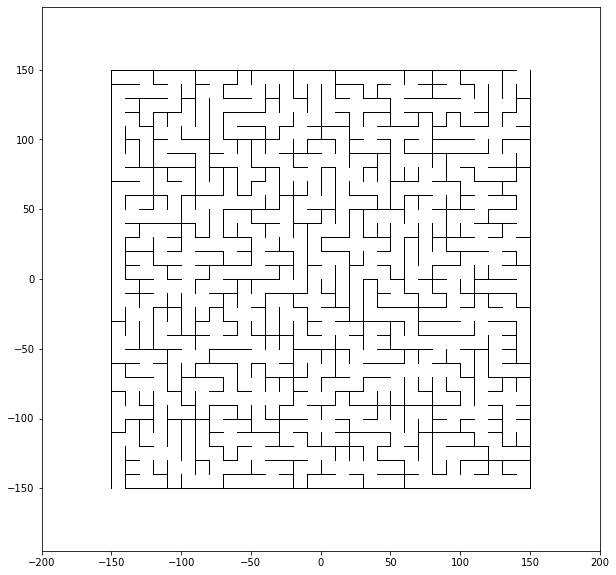

In [5]:
draw_maze(M,R,C)